In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

In [2]:
font = {'size'   : 1}

mpl.rcParams["font.size"] = 18

In [4]:
data = list()
tools=["optitype",'T1K','hlahd',"arcas",'hisat',"rna2hla","seq2hla","phlat","hlaforest","hlavbseq",'hlaminer']
#datasets=["1","d2","d3","d4","d5","d6"]
for t in tools:
    total = []
    for d in range(1,7):
        gs=pd.read_csv("../datasets/"+str(d)+"_gs.csv")
        pre=pd.read_csv("../results/standard/"+str(t)+"_d"+str(d)+".csv")
        
        for gene in ["A", "B", "C", "DQB1", "DRB1"]:
            target = gene + ".1"
            if (target not in pre.columns):
                continue
            pre[target].fillna(pre[gene], inplace=True)
            
            
        ret=compute_matches(pre,gs)
        print(t,"d"+str(d),ret)
        total.append(ret)
    data.append(total)

T1K d1 ([13, 7], [43, 92], [2884, 1861], 0)
T1K d2 ([0, 4], [0, 5], [0, 163], 0)
T1K d3 ([12, 0], [80, 0], [208, 0], 0)
T1K d4 ([0, 9], [0, 1], [0, 18], 0)
T1K d5 ([0, 0], [0, 0], [8, 0], 0)
T1K d6 ([4, 0], [0, 0], [4, 0], 0)
hlahd d1 ([34, 15], [104, 82], [2802, 1863], 0)
hlahd d2 ([0, 4], [0, 5], [0, 163], 0)
hlahd d3 ([15, 0], [90, 0], [195, 0], 0)
hlahd d4 ([0, 6], [0, 1], [0, 11], 10)
hlahd d5 ([0, 0], [0, 0], [8, 0], 0)
hlahd d6 ([4, 0], [0, 0], [4, 0], 0)
arcas d1 ([38, 6], [144, 127], [2758, 1827], 0)
arcas d2 ([0, 4], [0, 5], [0, 163], 0)
arcas d3 ([9, 0], [88, 0], [203, 0], 0)
arcas d4 ([0, 0], [0, 0], [0, 4], 24)
arcas d5 ([0, 0], [0, 0], [8, 0], 0)
arcas d6 ([3, 0], [0, 0], [5, 0], 0)
hisat d1 ([68, 32], [56, 100], [2816, 1828], 0)
hisat d2 ([0, 5], [0, 7], [0, 160], 0)
hisat d3 ([27, 0], [67, 0], [206, 0], 0)
hisat d4 ([0, 10], [0, 0], [0, 10], 8)
hisat d5 ([0, 0], [0, 0], [8, 0], 0)
hisat d6 ([4, 0], [0, 0], [4, 0], 0)
seq2hla d1 ([35, 114], [104, 192], [2801, 1654], 0)
e

In [5]:
# sorting through code to calculate Class I and Class II accuracy
data = np.array(data)

classIresults = []
classIIresults = []
allresults = []

for tool in data:
    r = np.sum(np.array(tool),axis=0)
    allresults.append(r[:,0]+r[:,1])
    classIresults.append(r[:,0])
    classIIresults.append(r[:,1])

# normalizing accuracies to 1
classIresults = np.array(classIresults)
row_sums = classIresults.sum(axis=1)
classIresults = classIresults / row_sums[:, np.newaxis]


classIIresults = np.array(classIIresults)
row_sums = classIIresults.sum(axis=1)
classIIresults = classIIresults / row_sums[:, np.newaxis]
np.nan_to_num(classIIresults,0)

allresults = np.array(allresults)
row_sums = allresults.sum(axis=1)
allresults = allresults / row_sums[:, np.newaxis]


print(classIresults)
print(classIIresults)
print(allresults)



/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_80325/2963043930.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

        Tools      zero  two dig accuracy  four dig accuracy
0    optitype  0.006173          0.011111           0.982716
1         T1K  0.008237          0.033508           0.958255
2       hlahd  0.013386          0.042609           0.944005
3       arcas  0.010773          0.050212           0.939015
4       hisat  0.026237          0.035795           0.937969
5     rna2hla  0.029546          0.037105           0.933349
6     seq2hla  0.043698          0.057389           0.898912
7       phlat  0.055099          0.062230           0.882671
8   hlaforest  0.031668          0.118411           0.849921
9    hlavbseq  0.435509          0.036084           0.528407
10   hlaminer  0.803268          0.116340           0.080392


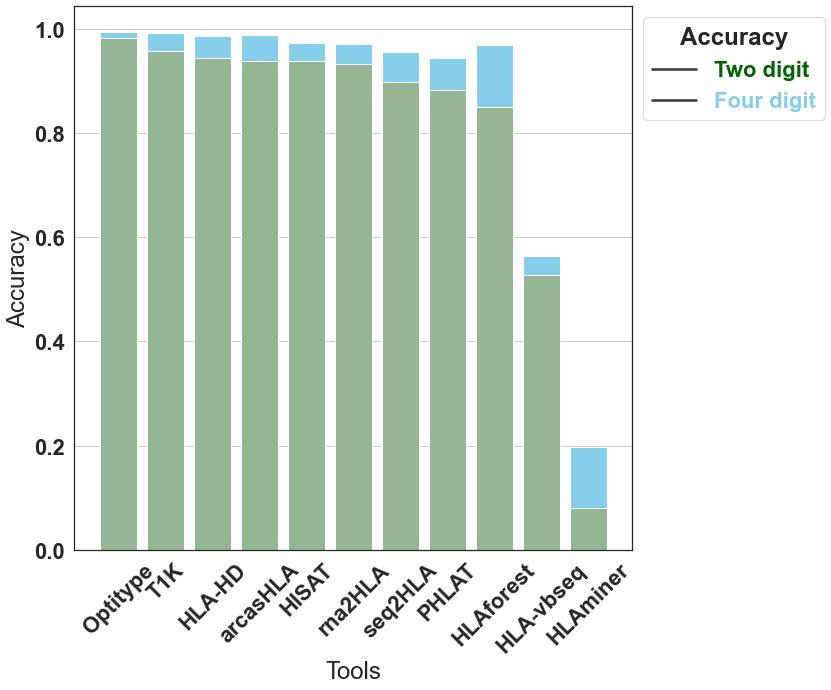

In [137]:
# combined accuracy (not split by class 1 and class 2)

combined_df = pd.DataFrame({'Tools': tools, 'zero': allresults[:, 0],'two dig accuracy': allresults[:, 1],'four dig accuracy': allresults[:, 2]})
print(combined_df)

sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=2)
sns.set_style("white")
plt.grid()


my_order=["Optitype","T1K","HLA-HD","arcasHLA","HISAT","rna2HLA","seq2HLA","PHLAT","HLAforest","HLA-vbseq",'HLAminer']

ax = sns.barplot(data=combined_df,x='Tools',y='four dig accuracy',color = "darkseagreen")
ax.bar(tools,allresults[:, 1],bottom=allresults[:, 2], color='skyblue')

ax.set_xticklabels(labels=my_order, rotation = 45)
ax.set_ylabel("Accuracy")
plt.legend(title='Accuracy', loc='upper left', labels=['Two digit', 'Four digit'], labelcolor=['darkgreen','skyblue'],bbox_to_anchor=(1,1))

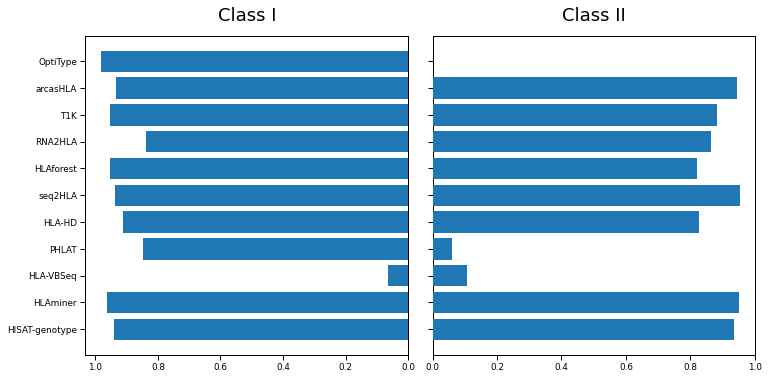

In [25]:
# class1 vs class2 barplot for 4 dig accuracy

index = ["OptiType","arcasHLA","T1K","RNA2HLA","HLAforest","seq2HLA","HLA-HD","PHLAT","HLA-VBSeq","HLAminer", "HISAT-genotype"]
title0 = 'Class I'
title1 = 'Class II'

fourdig_I = classIresults[:,2]
fourdig_II = classIIresults[:,2]

fig, axes = plt.subplots(figsize=(10,5),  ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, fourdig_I, align='center',zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15)
axes[1].barh(index, fourdig_II, align='center', zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15)


axes[0].invert_xaxis() 
plt.gca().invert_yaxis()

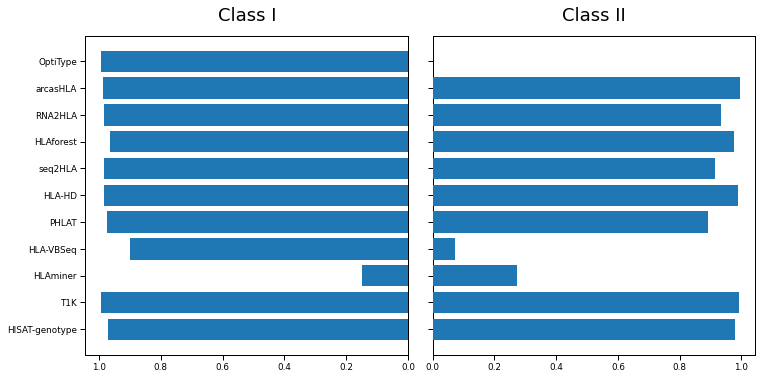

In [26]:
# class1 vs class2 barplot for 2 dig accuracy


index = ["OptiType","arcasHLA","RNA2HLA","HLAforest","seq2HLA","HLA-HD","PHLAT","HLA-VBSeq","HLAminer","T1K", "HISAT-genotype"]
title0 = 'Class I'
title1 = 'Class II'
twodig_I = classIresults[:,1]+classIresults[:,2]
twodig_II = classIIresults[:,1]+classIIresults[:,2]


fig, axes = plt.subplots(figsize=(10,5),  ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, twodig_I, align='center',zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15)
axes[1].barh(index, twodig_II, align='center', zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15)


axes[0].invert_xaxis() 
plt.gca().invert_yaxis()

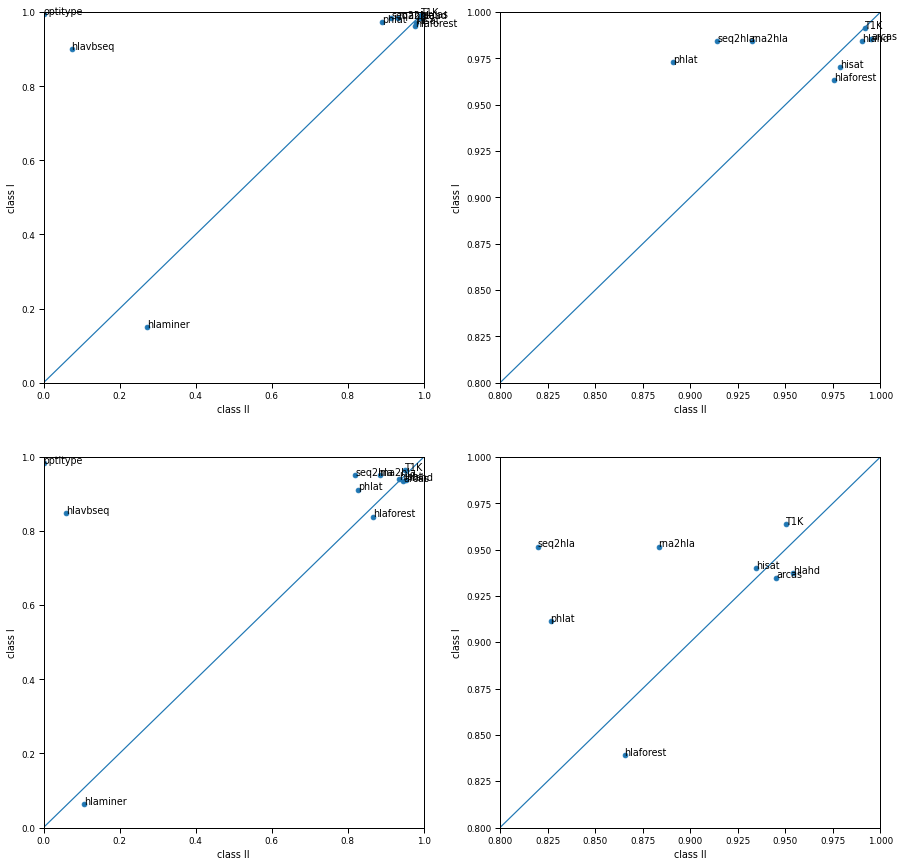

In [27]:
# class1 vs class2 scatterplot for 2 and 4 dig accuracy OLD


fig, ax = plt.subplots(2, 2,figsize=(15, 15))


ax[0][0].scatter(twodig_II,twodig_I)
for i, txt in enumerate(tools):
    ax[0][0].annotate(txt, (twodig_II[i], twodig_I[i]))
ax[0][0].set_xlim([0,1])
ax[0][0].set_ylim([0,1])
ax[0][0].set_xlabel("class II")
ax[0][0].set_ylabel("class I")
ax[0][0].plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))


ax[0][1].scatter(twodig_II,twodig_I)
for i, txt in enumerate(tools):
    ax[0][1].annotate(txt, (twodig_II[i], twodig_I[i]))
ax[0][1].set_xlim([0.8,1])
ax[0][1].set_ylim([0.8,1])
ax[0][1].set_xlabel("class II")
ax[0][1].set_ylabel("class I")
ax[0][1].plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))


ax[1][0].scatter(fourdig_II,fourdig_I)
for i, txt in enumerate(tools):
    ax[1][0].annotate(txt, (fourdig_II[i], fourdig_I[i]))
ax[1][0].set_xlim([0,1])
ax[1][0].set_ylim([0,1])
ax[1][0].set_xlabel("class II")
ax[1][0].set_ylabel("class I")
ax[1][0].plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))


ax[1][1].scatter(fourdig_II,fourdig_I)
for i, txt in enumerate(tools):
    ax[1][1].annotate(txt, (fourdig_II[i], fourdig_I[i]))
ax[1][1].set_xlim([0.8,1])
ax[1][1].set_ylim([0.8,1])
ax[1][1].set_xlabel("class II")
ax[1][1].set_ylabel("class I")
ax[1][1].plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))


In [28]:
labels=["OptiType","arcasHLA","RNA2HLA","HLAforest","seq2HLA","HLA-HD","PHLAT","HLA-VBSeq","HLAminer","T1K", "HISAT-genotype"]

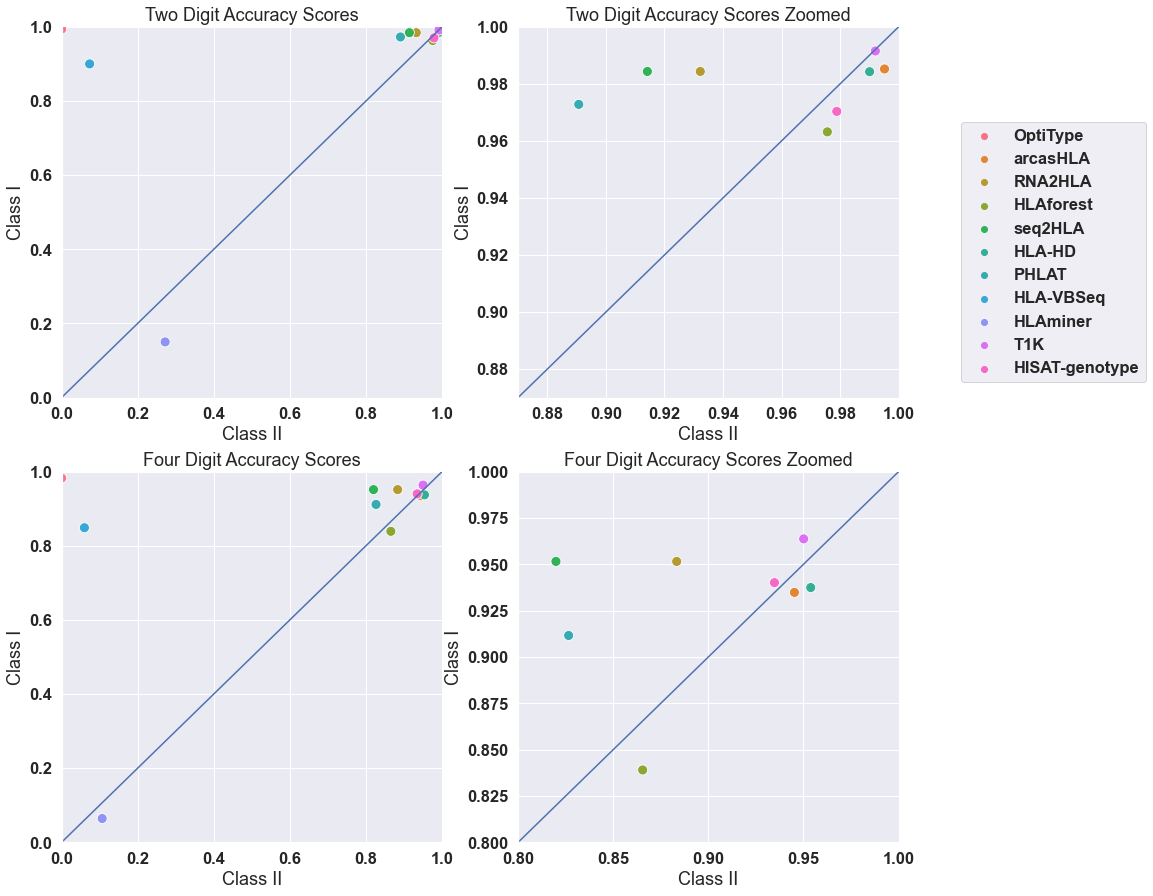

In [95]:
# class1 vs class2 scatterplot for 2 and 4 dig accuracy CURRENT


sns.set_context("paper")
sns.color_palette("pastel")
sns.set(font_scale=1.5)


fig, ax = plt.subplots(2, 2,figsize=(15, 15))
sns.scatterplot(ax=ax[0][0],x=twodig_II, y=twodig_I,hue=labels,legend=False, s=100)
#for i, txt in enumerate(labels):
#    ax[0][0].annotate(txt, (twodig_II[i], twodig_I[i]))
ax[0][0].plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))
ax[0][0].set_xlim([0,1])
ax[0][0].set_ylim([0,1])
ax[0][0].set_xlabel("Class II")
ax[0][0].set_ylabel("Class I")
ax[0][0].set(title='Two Digit Accuracy Scores')

sns.scatterplot(ax=ax[0][1],x=twodig_II, y=twodig_I,hue=labels,legend=False, s=100)
# for i, txt in enumerate(labels):
#     ax[0][1].annotate(txt, (twodig_II[i], twodig_I[i]))
ax[0][1].plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))
ax[0][1].set_xlim([0.87,1])
ax[0][1].set_ylim([0.87,1])
ax[0][1].set_xlabel("Class II")
ax[0][1].set_ylabel("Class I")
ax[0][1].set(title='Two Digit Accuracy Scores Zoomed')

sns.scatterplot(ax=ax[1][0],x=fourdig_II, y=fourdig_I,hue=labels,legend=False, s=100)
#for i, txt in enumerate(labels):
#    ax[1][0].annotate(txt, (fourdig_II[i], fourdig_I[i]))
ax[1][0].plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))
ax[1][0].set_xlim([0,1])
ax[1][0].set_ylim([0,1])
ax[1][0].set_xlabel("Class II")
ax[1][0].set_ylabel("Class I")
ax[1][0].set(title='Four Digit Accuracy Scores')

sns.scatterplot(ax=ax[1][1],x=fourdig_II, y=fourdig_I,hue=labels, s=100)
plt.legend([],[], frameon=False)
# for i, txt in enumerate(labels):
#     ax[1][1].annotate(txt, (fourdig_II[i], fourdig_I[i]))
ax[1][1].plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))
ax[1][1].set_xlim([0.8,1])
ax[1][1].set_ylim([0.8,1])
ax[1][1].set_xlabel("Class II")
ax[1][1].set_ylabel("Class I")
ax[1][1].set(title='Four Digit Accuracy Scores Zoomed')
#handles, labels = ax[1][1].get_legend_handles_labels()

fig.legend(*ax[1][1].get_legend_handles_labels(), loc="upper left",ncol=1,bbox_to_anchor=(0.95,0.8))
sns.despine()